# Explorer Jesus
# Tratamiento de nulos y combinación de atributos que representan lo mismo.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/workspaces/Final_Project_DataScient/data/interim/data_limpia.zip')
df = data.copy()
df

,MARITAL,RENTHOM1,VETERAN3,EMPLOY1,_AGEG5YR,_INCOMG1,_EDUCAG,_CHLDCNT,_EXTETH3,HHADULT,...,ACEPRISN,ACEDIVRC,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,FIREARM5,GUNLOAD,LOADULK2
0,1.0,1.0,2.0,7.0,13.0,9.0,4.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,2.0,2.0,13.0,3.0,2.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,2.0,7.0,8.0,6.0,4.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,2.0,7.0,14.0,9.0,2.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,2.0,5.0,5.0,3.0,3.0,1.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,5.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445128,1.0,1.0,1.0,1.0,7.0,5.0,4.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445129,1.0,3.0,2.0,8.0,10.0,9.0,2.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445130,1.0,2.0,2.0,7.0,11.0,5.0,3.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tratamiento de nulos
Las columnas que tengan más de un 60% de nulos y poca correlación con nuestra variable objetivo, intentaremos fusionar con otra si representa lo mismo o se eliminará.

### Definición de la variable objetivo

Definiremos ADDEPEV3 como nuestra variable objetivo. Esta variable indica si la persona encuestada ha sido diagnosticada alguna vez con depresión.

In [ ]:
# Observamos los valores que contiene.
df['ADDEPEV3'].value_counts()

ADDEPEV3
2.0    350910
1.0     91410
7.0      2140
9.0       665
Name: count, dtype: int64

In [8]:
# Lo llevamos a una variable binaria.
# Eliminamos NAN y los valores 7 y 9 (Don’t know/Refused/Missing)
# Pasamos 2 (no) a 0

df['ADDEPEV3'].dropna()
df = df[~df["ADDEPEV3"].isin([9,7])]
df.loc[df["ADDEPEV3"] == 2, "ADDEPEV3"] = 0


print(df["ADDEPEV3"].value_counts())
print(df.shape)

ADDEPEV3
0.0    350910
1.0     91410
Name: count, dtype: int64
(442327, 82)


/tmp/ipykernel_827/1533398761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["ADDEPEV3"] == 2, "ADDEPEV3"] = 0


### Matriz de Correlación

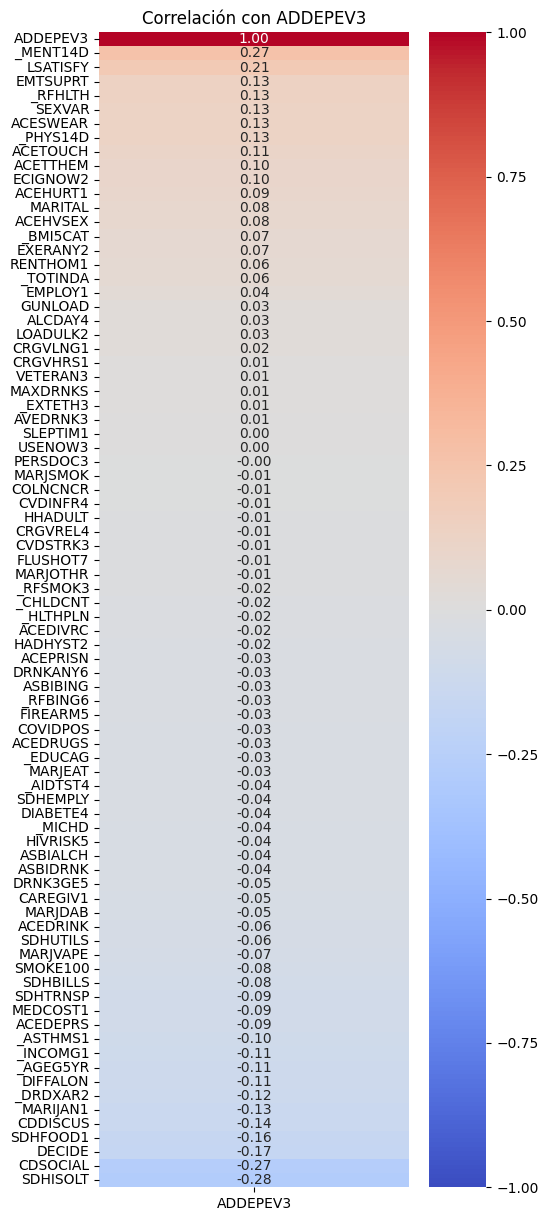

In [9]:
# Calculamos la matriz de correlación
cor_matrix = df.corr()

# Extraemos correlación con ADDEPEV3
cor_target = cor_matrix[["ADDEPEV3"]].sort_values(by="ADDEPEV3", ascending=False)

# Hacemos el heatmap
plt.figure(figsize=(5, 15))
sns.heatmap(cor_target, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación con ADDEPEV3")
plt.show()

## Agrupación de atributos por temática
Agruparemos los atributos según su temática con el objetivo de identificar cuáles pueden ser descartados o combinados entre sí.

In [ ]:
salud_mental = df[['DECIDE','DIFFALON','_MENT14D','LSATISFY','EMTSUPRT','SDHISOLT','CDSOCIAL','CDDISCUS']]
aces = df[['ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX']]
estado_de_salud = df[['_RFHLTH','_PHYS14D','CVDINFR4','CVDSTRK3','DIABETE4','_MICHD','_ASTHMS1','_DRDXAR2','COVIDPOS','_BMI5CAT','SLEPTIM1']]


,_RFHLTH,_PHYS14D,CVDINFR4,CVDSTRK3,DIABETE4,_MICHD,_ASTHMS1,_DRDXAR2,COVIDPOS,_BMI5CAT,SLEPTIM1
0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,NaN,8.0
1,1.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,6.0
2,1.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,1.0,3.0,5.0
3,1.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,2.0,7.0
4,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
445127,1.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,1.0,3.0,6.0
445128,1.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,7.0
445129,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,5.0
445130,1.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,4.0,5.0


In [3]:
# 6. Consumo de marihuana
marijuana_columns = ['MARIJAN1', 'MARJSMOK', 'MARJEAT', 'MARJVAPE', 'MARJDAB', 'MARJOTHR']

# ¿Ha consumido marihuana alguna vez?
df['marijuana_use'] = df[marijuana_columns].fillna(0).any(axis=1).astype(int)

# ¿Cuántas formas de consumo ha reportado?
df['marijuana_forms'] = df[['MARJSMOK', 'MARJEAT', 'MARJVAPE', 'MARJDAB', 'MARJOTHR']].fillna(0).astype(int).sum(axis=1)
df['marijuana_use'].value_counts()

marijuana_use
0    350212
1     94920
Name: count, dtype: int64

In [4]:
df[marijuana_columns].isnull().sum()

MARIJAN1    350213
MARJSMOK    433622
MARJEAT     433628
MARJVAPE    433629
MARJDAB     433637
MARJOTHR    433645
dtype: int64

### Detección de nulos

In [10]:
columnas_a_borrar = []

for i in data.columns:
    porcentaje_nulos = df[i].isnull().sum() / len(df) * 100
    print(f'Columna: {i} - Porcentaje de valores nulos: {porcentaje_nulos:.2f}%')
    if porcentaje_nulos >= 60:
        columnas_a_borrar.append(i)

Columna: MARITAL - Porcentaje de valores nulos: 0.00%
Columna: RENTHOM1 - Porcentaje de valores nulos: 0.00%
Columna: VETERAN3 - Porcentaje de valores nulos: 0.94%
Columna: EMPLOY1 - Porcentaje de valores nulos: 1.39%
Columna: _AGEG5YR - Porcentaje de valores nulos: 0.00%
Columna: _INCOMG1 - Porcentaje de valores nulos: 0.00%
Columna: _EDUCAG - Porcentaje de valores nulos: 0.00%
Columna: _CHLDCNT - Porcentaje de valores nulos: 0.00%
Columna: _EXTETH3 - Porcentaje de valores nulos: 0.00%
Columna: HHADULT - Porcentaje de valores nulos: 21.60%
Columna: SEXVAR - Porcentaje de valores nulos: 0.00%
Columna: PERSDOC3 - Porcentaje de valores nulos: 0.00%
Columna: MEDCOST1 - Porcentaje de valores nulos: 0.00%
Columna: _HLTHPLN - Porcentaje de valores nulos: 0.00%
Columna: _AIDTST4 - Porcentaje de valores nulos: 10.37%
Columna: SDHEMPLY - Porcentaje de valores nulos: 43.04%
Columna: SDHFOOD1 - Porcentaje de valores nulos: 43.19%
Columna: SDHUTILS - Porcentaje de valores nulos: 43.31%
Columna: SD

In [11]:
columnas_a_borrar

['CDSOCIAL',
 'CDDISCUS',
 'CAREGIV1',
 'CRGVREL4',
 'CRGVLNG1',
 'CRGVHRS1',
 'MARIJAN1',
 'MARJSMOK',
 'MARJEAT',
 'MARJVAPE',
 'MARJDAB',
 'MARJOTHR',
 'ASBIALCH',
 'ASBIDRNK',
 'ASBIBING',
 'ACEDEPRS',
 'ACEDRINK',
 'ACEDRUGS',
 'ACEPRISN',
 'ACEDIVRC',
 'ACEHURT1',
 'ACESWEAR',
 'ACETOUCH',
 'ACETTHEM',
 'ACEHVSEX',
 'FIREARM5',
 'GUNLOAD',
 'LOADULK2']

In [5]:
columnas_a_borrar = []

for i in df.columns:
    porcentaje_nulos = df[i].isnull().sum() / len(df) * 100
    print(f'Columna: {i} - Porcentaje de valores nulos: {porcentaje_nulos:.2f}%')
    if porcentaje_nulos >= 60:
        columnas_a_borrar.append(i)

Columna: MARITAL - Porcentaje de valores nulos: 0.00%
Columna: RENTHOM1 - Porcentaje de valores nulos: 0.00%
Columna: VETERAN3 - Porcentaje de valores nulos: 0.94%
Columna: EMPLOY1 - Porcentaje de valores nulos: 1.39%
Columna: _AGEG5YR - Porcentaje de valores nulos: 0.00%
Columna: _INCOMG1 - Porcentaje de valores nulos: 0.00%
Columna: _EDUCAG - Porcentaje de valores nulos: 0.00%
Columna: _CHLDCNT - Porcentaje de valores nulos: 0.00%
Columna: _EXTETH3 - Porcentaje de valores nulos: 0.00%
Columna: HHADULT - Porcentaje de valores nulos: 21.58%
Columna: SEXVAR - Porcentaje de valores nulos: 0.00%
Columna: MEDCOST1 - Porcentaje de valores nulos: 0.00%
Columna: _HLTHPLN - Porcentaje de valores nulos: 0.00%
Columna: _AIDTST4 - Porcentaje de valores nulos: 10.39%
Columna: CDSOCIAL - Porcentaje de valores nulos: 98.33%
Columna: CDDISCUS - Porcentaje de valores nulos: 98.34%
Columna: CRGVREL4 - Porcentaje de valores nulos: 95.59%
Columna: CRGVLNG1 - Porcentaje de valores nulos: 95.60%
Columna: C

In [6]:
columnas_a_borrar

['CDSOCIAL', 'CDDISCUS', 'CRGVREL4', 'CRGVLNG1', 'CRGVHRS1', 'MARIJAN1']

### Columnas a modificar por Jesús

In [15]:
# Question:  Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
df['_TOTINDA'].value_counts()

_TOTINDA
1.0    337559
2.0    106480
9.0      1093
Name: count, dtype: int64

In [16]:
# 9 (Don’t know/Refused/Missing) >> Cambiar a -1
df.loc[df["_TOTINDA"] == 9, "_TOTINDA"] = -1
df.loc[df["_TOTINDA"] == 2, "_TOTINDA"] = 0

df["_TOTINDA"].value_counts()

_TOTINDA
 1.0    337559
 0.0    106480
-1.0      1093
Name: count, dtype: int64

In [17]:
# Question:  (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)
df['ADDEPEV3'].value_counts(dropna=False)

ADDEPEV3
2.0    350910
1.0     91410
7.0      2140
9.0       665
NaN         7
Name: count, dtype: int64

In [18]:
# Eliminamos NAN y los valores 7 y 9 (Don’t know/Refused/Missing)
# Pasamos 2 (no) a 0

df['ADDEPEV3'].dropna()
df = df[~df["ADDEPEV3"].isin([9,7])]
df.loc[df["ADDEPEV3"] == 2, "ADDEPEV3"] = 0


print(df["ADDEPEV3"].value_counts())
print(df.shape)

ADDEPEV3
0.0    350910
1.0     91410
Name: count, dtype: int64
(442327, 36)


/tmp/ipykernel_779/1478865628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["ADDEPEV3"] == 2, "ADDEPEV3"] = 0


In [22]:
# Question:  Has a doctor, nurse, or other health professional ever told you that you tested positive for COVID 19?
df['COVIDPOS'].value_counts(dropna=False)

COVIDPOS
2.0    268442
1.0    125595
0.0     33529
3.0     13375
9.0       759
7.0       627
Name: count, dtype: int64

In [27]:
# Se juntó 1 y 3(Positivo con prueba casera) = 1
#  2(No) = 0
# 7,9(Don’t know/Refused/Missing) = -1 

df.loc[df["COVIDPOS"] > 6, "COVIDPOS"] = -1
df.loc[df["COVIDPOS"] == 2, "COVIDPOS"] = 0
df.loc[df["COVIDPOS"] == 3, "COVIDPOS"] = 1

df["COVIDPOS"].value_counts(dropna=False)


/tmp/ipykernel_779/3385643432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["COVIDPOS"] > 6, "COVIDPOS"] = -1
/tmp/ipykernel_779/3385643432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["COVIDPOS"] == 2, "COVIDPOS"] = 0
/tmp/ipykernel_779/3385643432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["COVIDPOS"] == 3, "COVIDPOS"] = 1


COVIDPOS
 0.0    301971
 1.0    138970
-1.0      1386
Name: count, dtype: int64

In [24]:
# Rellenamos los NAN de manera proporcional.
# Porcentajes (excluyendo -1.0)

total_validos = 268442 + 123648
p_0 = 268442 / total_validos
p_1 = 123648 / total_validos

# Crear valores aleatorios según esa proporción
valores_nuevos = np.random.choice([0.0, 1.0], size=df["COVIDPOS"].isna().sum(), p=[p_0, p_1])

# Asignarlos a los NaN
df.loc[df["COVIDPOS"].isna(), "COVIDPOS"] = valores_nuevos
df["COVIDPOS"].value_counts()


/tmp/ipykernel_779/3198490329.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["COVIDPOS"].isna(), "COVIDPOS"] = valores_nuevos


COVIDPOS
 0.0    301971
 1.0    138970
-1.0      1386
Name: count, dtype: int64

In [28]:
# Question:  3 level not good physical health status: 0 days, 1-13 days, 14-30 days
df['_PHYS14D'].value_counts(dropna=False)

_PHYS14D
1.0    266620
2.0    107575
3.0     57478
9.0     10654
Name: count, dtype: int64

In [29]:
# Se realizaron los siguientes cambios
# 1(0 días con mala salud) = 0
# 2(1-13 días) = 1
# 2(14-30 días) = 2
# 9(Don’t know/Refused/Missing) = -1 

df.loc[df["_PHYS14D"] == 9, "_PHYS14D"] = -1
df.loc[df["_PHYS14D"] == 1, "_PHYS14D"] = 0
df.loc[df["_PHYS14D"] == 2, "_PHYS14D"] = 1
df.loc[df["_PHYS14D"] == 3, "_PHYS14D"] = 2


df["_PHYS14D"].value_counts(dropna=False)

/tmp/ipykernel_779/1078946329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["_PHYS14D"] == 9, "_PHYS14D"] = -1
/tmp/ipykernel_779/1078946329.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["_PHYS14D"] == 1, "_PHYS14D"] = 0
/tmp/ipykernel_779/1078946329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["_PHYS14D"] == 2, "_PHYS14D"] = 1
/tmp/ipykernel_779/1078946329.py:10: SettingWithCopyWarning:

_PHYS14D
 0.0    266620
 1.0    107575
 2.0     57478
-1.0     10654
Name: count, dtype: int64

In [ ]:
# Question:  3 level not good mental health status: 0 days, 1-13 days, 14-30 days
df['_MENT14D'].value_counts(dropna=False)

_MENT14D
1.0    264432
2.0    109811
3.0     59462
9.0      8622
Name: count, dtype: int64

In [32]:
# Se realizaron los siguientes cambios
# 1(0 días con mala salud) = 0
# 2(1-13 días) = 1
# 2(14-30 días) = 2
# 9(Don’t know/Refused/Missing) = -1 

df.loc[df["_MENT14D"] == 9, "_MENT14D"] = -1
df.loc[df["_MENT14D"] == 1, "_MENT14D"] = 0
df.loc[df["_MENT14D"] == 2, "_MENT14D"] = 1
df.loc[df["_MENT14D"] == 3, "_MENT14D"] = 2


df["_MENT14D"].value_counts(dropna=False)

/tmp/ipykernel_779/399812987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["_MENT14D"] == 9, "_MENT14D"] = -1
/tmp/ipykernel_779/399812987.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["_MENT14D"] == 1, "_MENT14D"] = 0
/tmp/ipykernel_779/399812987.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["_MENT14D"] == 2, "_MENT14D"] = 1
/tmp/ipykernel_779/399812987.py:10: SettingWithCopyWarning: 
A 

_MENT14D
 0.0    264432
 1.0    109811
 2.0     59462
-1.0      8622
Name: count, dtype: int64

In [42]:
# Question:  Four-categories of Body Mass Index (BMI)
df['_BMI5CAT'].value_counts(dropna=False)

_BMI5CAT
3.0    139995
4.0    132577
2.0    116976
NaN     48806
1.0      6778
Name: count, dtype: int64

In [ ]:
# Se realizaron los siguientes cambios
# 1 = 0
# 2 = 1
# 3 = 2
# 4 = 3
# NAN (Don’t know/Refused/Missing) = -1 

df.loc[df["_BMI5CAT"] == 1, "_BMI5CAT"] = 0
df.loc[df["_BMI5CAT"] == 2, "_BMI5CAT"] = 1
df.loc[df["_BMI5CAT"] == 3, "_BMI5CAT"] = 2
df.loc[df["_BMI5CAT"] == 4, "_BMI5CAT"] = 3
df["_BMI5CAT"].fillna(-1, inplace=True)

df["_BMI5CAT"].value_counts(dropna=False)

/tmp/ipykernel_779/1542337306.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["_BMI5CAT"].fillna(-1, inplace=True)


_BMI5CAT
 2.0    139995
 3.0    132577
 1.0    116976
-1.0     48806
 0.0      6778
Name: count, dtype: int64

In [51]:
# Question:  In general, how satisfied are you with your life?
df['LSATISFY'].value_counts(dropna=False)

LSATISFY
NaN    190644
2.0    123445
1.0    114252
3.0     10758
4.0      3062
7.0      1864
9.0      1107
Name: count, dtype: int64

In [52]:
# Se realizaron los siguientes cambios
# 1 = 0
# 2 = 1
# 3 = 2
# 4 = 3
# NAN = Se rellenaran de manera proporcional.


df.loc[df["LSATISFY"] == 1, "LSATISFY"] = 0
df.loc[df["LSATISFY"] == 2, "LSATISFY"] = 1
df.loc[df["LSATISFY"] == 3, "LSATISFY"] = 2
df.loc[df["LSATISFY"] == 4, "LSATISFY"] = 3
df.loc[df["LSATISFY"] > 6, "LSATISFY"] = -1

df["LSATISFY"].value_counts(dropna=False)

LSATISFY
 NaN    190644
 1.0    123445
 0.0    114252
 2.0     10758
 3.0      3062
-1.0      2971
Name: count, dtype: int64

In [ ]:
# Contar valores válidos (excluyendo NaN)
valores_validos = df["LSATISFY"].value_counts(normalize=True, dropna=True)

# Crear una muestra aleatoria con esa distribución
valores_nuevos = np.random.choice(
    valores_validos.index,                  # [1, 0, 2, 3, -1]
    size=df["LSATISFY"].isna().sum(),       # 190644
    p=valores_validos.values                # proporciones respectivas
)

# Rellenar los NaN
df.loc[df["LSATISFY"].isna(), "LSATISFY"] = valores_nuevos
df['LSATISFY'].value_counts(dropna=False)


LSATISFY
 1.0    215887
 0.0    199935
 2.0     18788
 3.0      5366
-1.0      5156
Name: count, dtype: int64

In [ ]:
dta